In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "Blobs_smp20000_fea30_cls8.xlsx"
df_omp = pd.read_excel(file,sheetname="OpenMP")
df_omp

,n_omp,Total,E-step,M-step,IO
0,1,2539.128065,2293.212175,245.102882,2.501011
1,2,1731.789112,1426.280260,304.410219,1.926899
2,4,1336.784840,934.716463,399.653912,2.602816
3,8,900.095940,490.777731,407.839060,2.654076
4,16,741.780996,309.553146,430.645466,2.640963
5,32,782.614946,210.109472,570.574045,2.243996
6,64,1440.789938,1023.807049,415.407658,2.650023


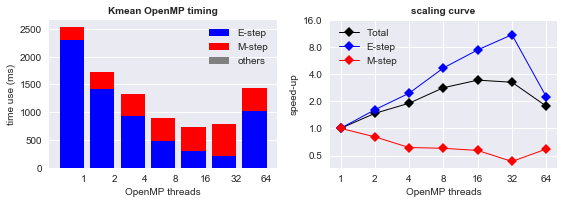

In [3]:
import matplotlib as mpl

fontsize=10 # fontsize for all text. 10 for 

mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize

data_omp = [df_omp["Total"].values,
             df_omp["E-step"].values,
             df_omp["M-step"].values,
             df_omp["Total"].values-df_omp["E-step"].values-df_omp["M-step"].values]

label_list = ["Total","E-step","M-step","others"]
color_list = ["Black","blue","red","grey"]

fig, axarr = plt.subplots(1,2,figsize=[8,3])
#fig.subplots_adjust(hspace=0.05)

def stackedbar(ax,n_list,data_list,xlabel):
    ind = np.arange(1,len(n_list)+1) 
    bottom = np.zeros_like(data_list[0])
    for data,label,color in zip(data_list,label_list[1:],color_list[1:]):
        # assume the first data is total and skip
        ax.bar(ind,data,bottom=bottom,color=color,label=label)
        bottom = bottom + data
    #ax.set_ylim([0,50000])
    #ax.set_xlim([0,7])
    ax.set_xticks(ind+0.4)
    ax.set_xticklabels(n_list)
    ax.xaxis.grid(False) 
    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylabel("time use (ms)",fontsize=fontsize)
        
stackedbar(axarr[0],df_omp["n_omp"],data_omp[1:],"OpenMP threads")

axarr[0].legend(loc=1,fontsize=fontsize)
axarr[0].set_title("Kmean OpenMP timing",fontsize=fontsize,fontweight="bold")

def scaling_curve(ax,n,data_list,xlabel):
    for data,label,color in zip(data_list,label_list,color_list):   
        ax.plot(n,data[0]/data,
                marker='D',label=label,color=color,linewidth=1)
        
    ax.set_xscale("log")

    ax.set_xticks(n)
    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xlim([0.8,80])
    
    ax.set_yscale("log")
    #ax.set_ylim([-0.5,32])
    ax.set_yticks(np.exp2(np.arange(-1,5)))
    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    
    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylabel("speed-up",fontsize=fontsize)
    ax.xaxis.label.set_size(fontsize)
        
scaling_curve(axarr[1],df_omp["n_omp"],data_omp[:-1],"OpenMP threads")
axarr[1].legend(loc=2,fontsize=fontsize)
axarr[1].set_title("scaling curve",fontsize=fontsize,fontweight="bold")

fig.tight_layout()
fig.savefig("plots/OpenMP_scaling.jpg",dpi=200)

In [4]:
df_mpi = pd.read_excel(file,sheetname="MPI")
df_mpi

,N_MPI,Total,E-step,M-step,IO
0,1,2327.527416,2080.869320,245.803846,3.746011
1,2,1370.546596,1208.027011,161.206449,3.857213
2,4,889.274717,783.437196,103.108949,4.113028
3,8,490.620752,421.552152,63.779867,4.099924
4,16,298.665461,221.786738,67.226194,4.935520
5,32,280.026070,183.410053,76.902479,9.008225
6,64,985.778767,106.266378,605.020996,19.194771


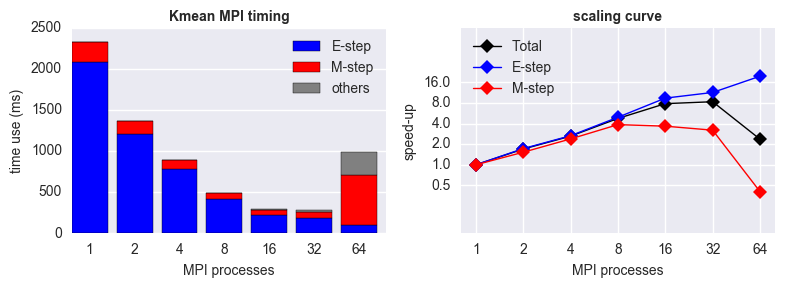

In [5]:
data_mpi = [df_mpi["Total"].values,
             df_mpi["E-step"].values,
             df_mpi["M-step"].values,
             df_mpi["Total"].values-df_mpi["E-step"].values-df_mpi["M-step"].values]

fig, axarr = plt.subplots(1,2,figsize=[8,3])

stackedbar(axarr[0],df_mpi["N_MPI"],data_mpi[1:],"MPI processes")

axarr[0].legend(loc=1,fontsize=fontsize)
axarr[0].set_title("Kmean MPI timing",fontsize=fontsize,fontweight="bold")

scaling_curve(axarr[1],df_mpi["N_MPI"],data_mpi[:-1],"MPI processes")
axarr[1].legend(loc=2,fontsize=fontsize)
axarr[1].set_title("scaling curve",fontsize=fontsize,fontweight="bold")

fig.tight_layout()
fig.savefig("plots/MPI_scaling.jpg",dpi=200)

In [9]:
df_cuda = pd.read_excel(file,sheetname="Cuda")
df_cuda

,t_cuda,Total,E-step,M-step,Cuda IO
0,1,783.192,356.6850,119.579,392.046
1,2,636.066,202.4170,132.818,294.903
2,4,547.731,108.1010,138.312,295.276
3,8,541.216,69.1309,169.700,296.227
4,16,511.788,38.1258,171.490,295.944
5,32,2496.990,245.1650,1894.401,322.414
6,64,2437.490,162.1510,1919.949,321.023


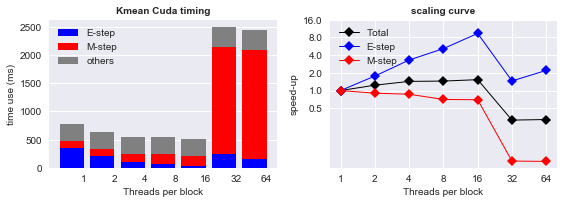

In [17]:
data_cuda = [df_cuda["Total"].values,
             df_cuda["E-step"].values,
             df_cuda["M-step"].values,
             df_cuda["Total"].values-df_cuda["E-step"].values-df_cuda["M-step"].values]

fig, axarr = plt.subplots(1,2,figsize=[8,3])

stackedbar(axarr[0],df_cuda["t_cuda"],data_cuda[1:],"Threads per block")

axarr[0].legend(loc=0,fontsize=fontsize)
axarr[0].set_title("Kmean Cuda timing",fontsize=fontsize,fontweight="bold")

scaling_curve(axarr[1],df_cuda["t_cuda"],data_cuda[:-1],"Threads per block")
axarr[1].legend(loc=2,fontsize=fontsize)
axarr[1].set_title("scaling curve",fontsize=fontsize,fontweight="bold")

fig.tight_layout()
fig.savefig("plots/Cuda_scaling.jpg",dpi=200)

In [6]:
df_hyb = pd.read_excel(file,sheetname="hybrid")
df_hyb["n_hybrid"] = df_hyb["N_MPI"]*df_hyb["n_omp"]
df_hyb.head()

,N_MPI,n_omp,Total,E-step,M-step,IO,n_hybrid
0,1,1,2363.860598,2112.615470,250.408402,4.006589,1
1,1,2,1662.239609,1356.238149,304.833094,3.732907,2
2,1,4,1189.350777,813.090273,375.009360,3.693638,4
3,1,8,931.707351,500.118240,429.142173,3.934515,8
4,2,1,1358.942563,1212.020400,145.609492,3.800784,2


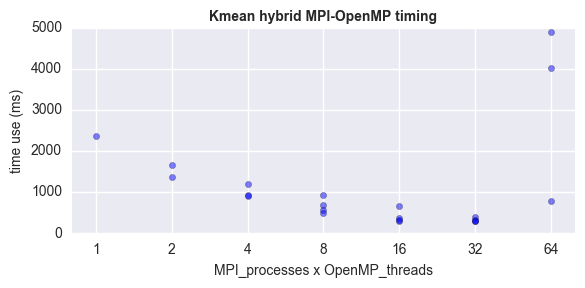

In [7]:
fig, ax = plt.subplots(figsize=[6,3])

ax.scatter(df_hyb["n_hybrid"],df_hyb["Total"],alpha=0.5)

ax.set_xscale("log")
ax.set_ylim([0,5000])

ax.set_xticks(np.exp2(np.arange(7)))
ax.set_xlim([0.8,80])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

plt.title('Kmean hybrid MPI-OpenMP timing',fontsize=fontsize,fontweight="bold")
ax.set_xlabel("MPI_processes x OpenMP_threads",fontsize=fontsize)
ax.set_ylabel("time use (ms)",fontsize=fontsize)
fig.tight_layout()
fig.savefig("plots/hybrid_scaling.jpg",dpi=200)

In [8]:
df_hyb.groupby('n_hybrid')["Total"].aggregate(['count','mean','min','max'])

,count,mean,min,max
n_hybrid,,,,
1,1,2363.860598,2363.860598,2363.860598
2,2,1510.591086,1358.942563,1662.239609
4,3,1014.122154,909.529512,1189.350777
8,4,668.929418,505.915032,931.707351
16,4,415.931598,301.355469,663.490676
32,4,331.330188,297.959041,402.007910
64,4,3724.246043,783.003317,5194.099651
128,3,12033.302202,10385.388325,13332.237565
256,2,32050.996865,30551.306969,33550.686761
